In [15]:
import pandas as pd
import numpy as np
movies=pd.read_csv('./data/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [20]:
ratings=pd.read_csv('./data/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [19]:
len(ratings)

100836

In [18]:
ratings=ratings[['userId', 'movieId', 'rating']]


In [23]:
ratings_df = ratings.groupby(['userId', 'movieId']).aggregate(np.max)
ratings_df.head()

rating  timestamp
userId movieId                   
1      1           4.0  964982703
       3           4.0  964981247
       6           4.0  964982224
       47          5.0  964983815
       50          5.0  964982931

In [21]:
len(ratings['userId'].unique())

610

In [25]:
count_ratings=ratings.groupby('rating').count()
count_ratings['perc_total']=round(count_ratings['userId']*100/count_ratings['userId'].sum(),1)
count_ratings

,userId,movieId,timestamp,perc_total
rating,,,,
0.5,1370,1370,1370,1.4
1.0,2811,2811,2811,2.8
1.5,1791,1791,1791,1.8
2.0,7551,7551,7551,7.5
2.5,5550,5550,5550,5.5
3.0,20047,20047,20047,19.9
3.5,13136,13136,13136,13.0
4.0,26818,26818,26818,26.6
4.5,8551,8551,8551,8.5


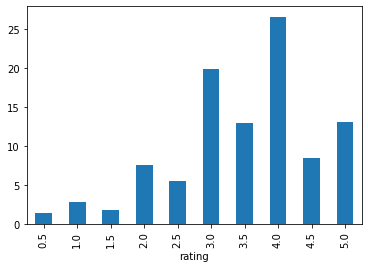

In [26]:
count_ratings['perc_total'].plot.bar()

In [27]:
len(movies)

9742

In [28]:
genres=movies['genres']
genres.head()

0    Adventure|Animation|Children|Comedy|Fantasy
1                     Adventure|Children|Fantasy
2                                 Comedy|Romance
3                           Comedy|Drama|Romance
4                                         Comedy
Name: genres, dtype: object

In [30]:
genre_list = ""
for index,row in movies.iterrows():
    genre_list += row.genres + "|"
genre_list_split = genre_list.split("|")
new_list = list(set(genre_list_split))
new_list.remove('')
new_list

['Sci-Fi',
 'Adventure',
 'Romance',
 'Drama',
 'Animation',
 'Western',
 'Documentary',
 'Thriller',
 'Fantasy',
 'War',
 'Film-Noir',
 'Horror',
 'Action',
 '(no genres listed)',
 'Musical',
 'Children',
 'Crime',
 'Comedy',
 'Mystery',
 'IMAX']

In [33]:
m=movies.copy()
for genre in new_list:
    m[genre] = m.apply(lambda _: int(genre in _.genres),axis=1)
m.head()

,movieId,title,genres,Sci-Fi,Adventure,Romance,Drama,Animation,Western,Documentary,...,Film-Noir,Horror,Action,(no genres listed),Musical,Children,Crime,Comedy,Mystery,IMAX
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [34]:
nor=len(ratings['userId'].unique())
nom=len(ratings['movieId'].unique())
sparsity=round(1.0-len(ratings)/(1.0*(nom*nor)), 3)
sparsity

0.983

In [36]:
avg = pd.DataFrame(ratings.groupby('movieId')['rating'].agg(['mean', 'count']))
avg['movieId'] = avg.index
avg.head()

,mean,count,movieId
movieId,,,
1,3.920930,215,1
2,3.431818,110,2
3,3.259615,52,3
4,2.357143,7,4
5,3.071429,49,5


In [37]:
np.percentile(avg['count'], 70)

7.0

In [40]:
idx2title = {int(row['movieId']):row['title'] for _,row in movies.iterrows()}
title2idx = {j:i for i,j in idx2title.items()}

In [41]:
highratings = ratings[ratings.rating >= 4]
itemsets = [[idx2title[mov] for mov in highratings[highratings.userId == user].movieId]
           for user in highratings.userId
           ]



In [47]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(itemsets).transform(itemsets)
df = pd.DataFrame(te_ary, columns = te.columns_)

In [49]:
from mlxtend.frequent_patterns import apriori, association_rules
f = apriori(df, min_support=0.2, use_colnames=True, max_len=2)
rules=association_rules(f, metric='lift', min_threshold=2)

In [50]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Blade Runner (1982)),(2001: A Space Odyssey (1968)),0.336414,0.333059,0.240243,0.714128,2.144151,0.128197,2.333009
1,(2001: A Space Odyssey (1968)),(Blade Runner (1982)),0.333059,0.336414,0.240243,0.721323,2.144151,0.128197,2.381197
2,(Dr. Strangelove or: How I Learned to Stop Wor...,(2001: A Space Odyssey (1968)),0.319926,0.333059,0.218979,0.684468,2.055096,0.112425,2.113703
3,(2001: A Space Odyssey (1968)),(Dr. Strangelove or: How I Learned to Stop Wor...,0.333059,0.319926,0.218979,0.657478,2.055096,0.112425,1.985492
4,"(Lion King, The (1994))",(Aladdin (1992)),0.331083,0.332565,0.232462,0.702126,2.111246,0.122355,2.240665


In [51]:
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Blade Runner (1982)),(2001: A Space Odyssey (1968)),0.336414,0.333059,0.240243,0.714128,2.144151,0.128197,2.333009
1,(2001: A Space Odyssey (1968)),(Blade Runner (1982)),0.333059,0.336414,0.240243,0.721323,2.144151,0.128197,2.381197
2,(Dr. Strangelove or: How I Learned to Stop Wor...,(2001: A Space Odyssey (1968)),0.319926,0.333059,0.218979,0.684468,2.055096,0.112425,2.113703
3,(2001: A Space Odyssey (1968)),(Dr. Strangelove or: How I Learned to Stop Wor...,0.333059,0.319926,0.218979,0.657478,2.055096,0.112425,1.985492
4,"(Lion King, The (1994))",(Aladdin (1992)),0.331083,0.332565,0.232462,0.702126,2.111246,0.122355,2.240665
5,(Aladdin (1992)),"(Lion King, The (1994))",0.332565,0.331083,0.232462,0.698997,2.111246,0.122355,2.222296
6,(Alien (1979)),(Aliens (1986)),0.421573,0.306319,0.268938,0.637939,2.082595,0.139802,1.915924
7,(Aliens (1986)),(Alien (1979)),0.306319,0.421573,0.268938,0.877965,2.082595,0.139802,4.739855
8,"(Amelie (Fabuleux destin d'Amélie Poulain, Le)...",(Eternal Sunshine of the Spotless Mind (2004)),0.316427,0.354323,0.227172,0.717929,2.026200,0.115055,2.289057
9,(Eternal Sunshine of the Spotless Mind (2004)),"(Amelie (Fabuleux destin d'Amélie Poulain, Le)...",0.354323,0.316427,0.227172,0.641143,2.026200,0.115055,1.904865
